<a href="https://colab.research.google.com/github/plumwiserim/Data-Analysis/blob/main/Class9_ML_AssociationRule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import mlxtend #aprior,Fp-Growth 를 사용하기 위해
import numpy as np
import pandas as pd

## 데이터셋

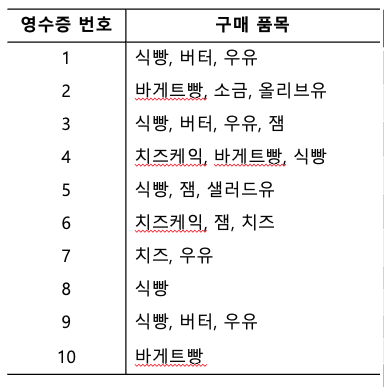

In [ ]:
data = np.array([
  ['식빵', '버터', '우유'],
  ['바게트빵', '소금', '올리브유'],
  ['식빵', '버터', '우유', '잼'],
  ['치즈케익', '바게트빵', '식빵'],
  ['식빵', '잼', '샐러드유'],
  ['치즈케익', '잼', '치즈'],
  ['치즈', '우유'],
  ['식빵'],
  ['식빵', '버터', '우유'],
  ['바게트빵']
])

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


array([list(['식빵', '버터', '우유']), list(['바게트빵', '소금', '올리브유']),
       list(['식빵', '버터', '우유', '잼']), list(['치즈케익', '바게트빵', '식빵']),
       list(['식빵', '잼', '샐러드유']), list(['치즈케익', '잼', '치즈']),
       list(['치즈', '우유']), list(['식빵']), list(['식빵', '버터', '우유']),
       list(['바게트빵'])], dtype=object)

In [ ]:
#Apriori 알고리즘
from mlxtend.preprocessing import TransactionEncoder
trans_enc = TransactionEncoder()
trans_arr = trans_enc.fit(data).transform(data)

In [ ]:
trans_arr

array([[False,  True, False, False,  True, False,  True, False, False,
        False],
       [ True, False, False,  True, False,  True, False, False, False,
        False],
       [False,  True, False, False,  True, False,  True,  True, False,
        False],
       [ True, False, False, False,  True, False, False, False, False,
         True],
       [False, False,  True, False,  True, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False,  True, False,  True,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False,  True, False, False,  True, False,  True, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False]])

- 참고 : http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/

In [ ]:
df = pd.DataFrame(trans_arr, columns=trans_enc.columns_)
df

,바게트빵,버터,샐러드유,소금,식빵,올리브유,우유,잼,치즈,치즈케익
0,False,True,False,False,True,False,True,False,False,False
1,True,False,False,True,False,True,False,False,False,False
2,False,True,False,False,True,False,True,True,False,False
3,True,False,False,False,True,False,False,False,False,True
4,False,False,True,False,True,False,False,True,False,False
5,False,False,False,False,False,False,False,True,True,True
6,False,False,False,False,False,False,True,False,True,False
7,False,False,False,False,True,False,False,False,False,False
8,False,True,False,False,True,False,True,False,False,False
9,True,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
'''
최소지지도 : min_support
결과 : 최소지지도를 만족하는 연관규칙들
'''
apriori(df, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.3,(바게트빵)
1,0.3,(버터)
2,0.6,(식빵)
3,0.4,(우유)
4,0.3,(잼)
5,0.3,"(식빵, 버터)"
6,0.3,"(우유, 버터)"
7,0.3,"(식빵, 우유)"
8,0.3,"(식빵, 우유, 버터)"


In [ ]:
#FP-Growth 알고리즘 : Apriori 알고리즘과 동일한 과정을 거침
from mlxtend.preprocessing import TransactionEncoder
trans_enc = TransactionEncoder()
trans_arr = trans_enc.fit(data).transform(data)
df = pd.DataFrame(trans_arr, columns=trans_enc.columns_)
df

,바게트빵,버터,샐러드유,소금,식빵,올리브유,우유,잼,치즈,치즈케익
0,False,True,False,False,True,False,True,False,False,False
1,True,False,False,True,False,True,False,False,False,False
2,False,True,False,False,True,False,True,True,False,False
3,True,False,False,False,True,False,False,False,False,True
4,False,False,True,False,True,False,False,True,False,False
5,False,False,False,False,False,False,False,True,True,True
6,False,False,False,False,False,False,True,False,True,False
7,False,False,False,False,True,False,False,False,False,False
8,False,True,False,False,True,False,True,False,False,False
9,True,False,False,False,False,False,False,False,False,False


In [ ]:
#upgrade 하지 않으면, fpgrowth를 사용할 수 없습니다.
!pip install mlxtend --upgrade

In [ ]:
%%time
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

fpgrowth(df, min_support=0.3, use_colnames=True)

CPU times: user 3.98 ms, sys: 158 µs, total: 4.14 ms
Wall time: 4.44 ms


In [ ]:
result = fpgrowth(df, min_support=0.3, use_colnames=True)
result

,support,itemsets
0,0.6,(식빵)
1,0.4,(우유)
2,0.3,(버터)
3,0.3,(바게트빵)
4,0.3,(잼)
5,0.3,"(식빵, 우유)"
6,0.3,"(우유, 버터)"
7,0.3,"(식빵, 버터)"
8,0.3,"(식빵, 우유, 버터)"


In [ ]:
association_rules(result)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(버터),(우유),0.3,0.4,0.3,1.0,2.500000,0.18,inf
1,(버터),(식빵),0.3,0.6,0.3,1.0,1.666667,0.12,inf
2,"(식빵, 우유)",(버터),0.3,0.3,0.3,1.0,3.333333,0.21,inf
3,"(식빵, 버터)",(우유),0.3,0.4,0.3,1.0,2.500000,0.18,inf
4,"(우유, 버터)",(식빵),0.3,0.6,0.3,1.0,1.666667,0.12,inf
5,(버터),"(식빵, 우유)",0.3,0.3,0.3,1.0,3.333333,0.21,inf


In [ ]:
'''
min_threshold : metric(confidence)에 대한 임계치
'''
association_rules(result, metric='confidence', min_threshold=0.5, support_only=False) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(식빵),(우유),0.6,0.4,0.3,0.50,1.250000,0.06,1.2
1,(우유),(식빵),0.4,0.6,0.3,0.75,1.250000,0.06,1.6
2,(우유),(버터),0.4,0.3,0.3,0.75,2.500000,0.18,2.8
3,(버터),(우유),0.3,0.4,0.3,1.00,2.500000,0.18,inf
4,(식빵),(버터),0.6,0.3,0.3,0.50,1.666667,0.12,1.4
5,(버터),(식빵),0.3,0.6,0.3,1.00,1.666667,0.12,inf
6,"(식빵, 우유)",(버터),0.3,0.3,0.3,1.00,3.333333,0.21,inf
7,"(식빵, 버터)",(우유),0.3,0.4,0.3,1.00,2.500000,0.18,inf
8,"(우유, 버터)",(식빵),0.3,0.6,0.3,1.00,1.666667,0.12,inf
9,(식빵),"(우유, 버터)",0.6,0.3,0.3,0.50,1.666667,0.12,1.4


In [ ]:
'''
lift 가장 높은 값은?
'''
result_df = association_rules(result, metric='confidence', min_threshold=0.5, support_only=False) 
result_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(식빵),(우유),0.6,0.4,0.3,0.50,1.250000,0.06,1.2
1,(우유),(식빵),0.4,0.6,0.3,0.75,1.250000,0.06,1.6
2,(우유),(버터),0.4,0.3,0.3,0.75,2.500000,0.18,2.8
3,(버터),(우유),0.3,0.4,0.3,1.00,2.500000,0.18,inf
4,(식빵),(버터),0.6,0.3,0.3,0.50,1.666667,0.12,1.4
5,(버터),(식빵),0.3,0.6,0.3,1.00,1.666667,0.12,inf
6,"(식빵, 우유)",(버터),0.3,0.3,0.3,1.00,3.333333,0.21,inf
7,"(식빵, 버터)",(우유),0.3,0.4,0.3,1.00,2.500000,0.18,inf
8,"(우유, 버터)",(식빵),0.3,0.6,0.3,1.00,1.666667,0.12,inf
9,(식빵),"(우유, 버터)",0.6,0.3,0.3,0.50,1.666667,0.12,1.4


In [ ]:
sort_df = result_df.sort_values(by='lift', ascending=False)

In [ ]:
sort_df.loc[0, 'lift']

1.25